# **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualisation**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,ts,device,co,humidity,light,gas,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
df.shape

(405184, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   gas       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [ ]:
df.describe()

,ts,co,humidity,gas,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.592943e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,4.557306e+06,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.590000e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.590000e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.590000e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.600000e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.600000e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [ ]:
df.isnull().sum()

ts          0
device      0
co          0
humidity    0
light       0
gas         0
motion      0
smoke       0
temp        0
dtype: int64

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
dfle = df
dfle.light = Le.fit_transform(dfle.light)
dfle.motion = Le.fit_transform(dfle.motion)
dfle.device = Le.fit_transform(dfle.device)
dfle.ts = Le.fit_transform(dfle.ts)
dfle.head()

,ts,device,co,humidity,light,gas,motion,smoke,temp
0,0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,0,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,0,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,0,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,0,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [ ]:
df['device'].unique()

array([2, 0, 1])

In [ ]:
df['ts'].unique()

array([0, 1])

In [ ]:
df['motion'].unique()

array([0, 1])

# **Data Preperation**

In [ ]:
X = dfle.drop('motion', axis=1)
y = dfle['motion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state = 10)


In [ ]:
print("Training set: {}".format(X_train.shape))  
print("Testing set:  {}".format(X_test.shape)) 
print("Training set: {}".format(y_train.shape))  
print("Testing set:  {}".format(y_test.shape)) 

Training set: (324147, 8)
Testing set:  (81037, 8)
Training set: (324147,)
Testing set:  (81037,)


In [ ]:
new_X_train = np.asarray(X_train)
new_y_train = np.asarray(y_train)
new_X_test = np.asarray(X_test)
new_y_test = np.asarray(y_test)



In [ ]:
print("X train set:  {}".format(new_X_train.shape))
print("y train set:  {}".format(new_y_train.shape))
print("X test set:  {}".format(new_X_test.shape))
print("y test set:  {}".format(new_y_test.shape))


X train set:  (324147, 8)
y train set:  (324147,)
X test set:  (81037, 8)
y test set:  (81037,)


In [ ]:
new_X_train = new_X_train.reshape((new_X_train.shape[0], new_X_train.shape[1],1))
new_X_test = new_X_test.reshape((new_X_test.shape[0], new_X_test.shape[1],1))

print(new_X_train.shape)
print(new_X_test.shape)


(324147, 8, 1)
(81037, 8, 1)


In [ ]:
new_y_train = new_y_train.reshape((new_y_train.shape[0],1))
new_y_test = new_y_test.reshape((new_y_test.shape[0],1))

print(new_y_train.shape)
print(new_y_test.shape)


(324147, 1)
(81037, 1)


# **Building and Training the model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
import tensorflow as tf



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(100,3, activation='relu',input_shape=(8,1)))

model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 100)            400       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 100)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 512)               154112    
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 155,025
Trainable params: 155,025
Non-trainable params: 0
__________________________________________________

In [ ]:
checkpointer = EarlyStopping(monitor = 'val_accuracy', verbose = 0, restore_best_weights=True,mode="max", patience = 8)

In [ ]:
history = model.fit(new_X_train, new_y_train, validation_split = 0.8, epochs = 100, callbacks = [checkpointer])

Epoch 1/100
2026/2026 [==============================] - 32s 15ms/step - loss: 0.0014 - accuracy: 0.9985 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 2/100
2026/2026 [==============================] - 26s 13ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 3/100
2026/2026 [==============================] - 26s 13ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 4/100
2026/2026 [==============================] - 25s 12ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 5/100
2026/2026 [==============================] - 26s 13ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 6/100
2026/2026 [==============================] - 24s 12ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 7/100
2026/2026 [==============================] - 31s 15ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0

# **Model Evaluation**

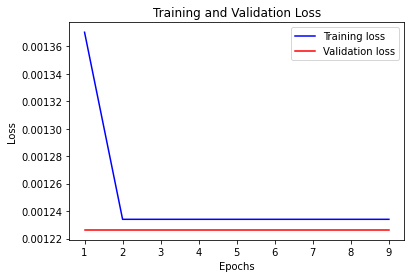

In [ ]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

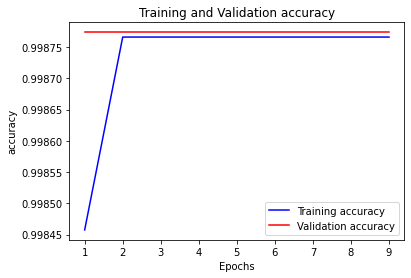

In [ ]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
print(f"Final Training loss, Final Training accuracy = {model.evaluate(new_X_train, new_y_train)}")

10130/10130 [==============================] - 27s 3ms/step - loss: 0.0012 - accuracy: 0.9988
Final Training loss, Final Training accuracy = [0.0012278379872441292, 0.998772144317627]


In [ ]:
 print(f"Final Testing loss, Final Testing accuracy = {model.evaluate(new_X_test, new_y_test)}")

2533/2533 [==============================] - 6s 2ms/step - loss: 0.0010 - accuracy: 0.9990
Final Testing loss, Final Testing accuracy = [0.0010365635389462113, 0.9989634156227112]


# **Model Predictions**

In [ ]:
predictions = model.predict(new_X_test[1:10])
print("Predicted values are: ", predictions)
print("Original values are: ", new_y_test[1:10])

1/1 [==============================] - 0s 113ms/step
Predicted values are:  [[6.0683521e-19]
 [1.5709312e-21]
 [2.6107512e-20]
 [2.4766802e-27]
 [4.6339593e-25]
 [1.3066332e-27]
 [4.7556772e-27]
 [1.7419388e-18]
 [6.9144544e-20]]
Original values are:  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
predicted = model.predict(new_X_test)

2533/2533 [==============================] - 5s 2ms/step


In [ ]:
result = []
for item in predicted:
    result.append(np.argmax(item))

In [ ]:
cm = confusion_matrix(new_y_test,result)

In [ ]:
print(cm)

[[80953     0]
 [   84     0]]


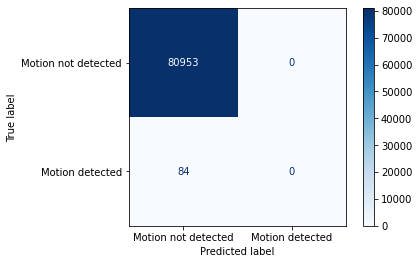

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(new_y_test,result)
labels = ["Motion not detected","Motion detected"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()